## 1. Import packages

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Load data

In [3]:
(x_train, y_train), (x_notrain, y_notrain) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

### split the non-training data into two parts: validation set and test set

In [6]:
x_validation = x_notrain[:5000,:]
y_validation = y_notrain[:5000,]

In [7]:
x_test = x_notrain[5000:,:]
y_test = y_notrain[5000:,]

## 3. Visualize data

In [12]:
randnum = np.random.randint(0, 60000, 4)

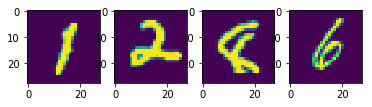

In [13]:
for icount in np.arange(4):
    plt.subplot(1,4,icount+1)
    img_current = x_train[randnum[icount]]
    plt.imshow(img_current)    

## 4. Prepare data in the right format

In [14]:
x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')/225

In [15]:
x_validation = x_validation.reshape(x_validation.shape[0], 784).astype('float32')/225

In [16]:
x_test = x_test.reshape(x_test.shape[0],784).astype('float32')/225

In [17]:
y_train = keras.utils.to_categorical(y_train,10)
y_validation = keras.utils.to_categorical(y_validation,10)
y_test = keras.utils.to_categorical(y_test,10)

## 5. Build up your neural networks

In [18]:
model = Sequential()
model.add(Dense(128,input_dim=784, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

## 6. Train your neural networks

In [20]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_validation,y_validation))

Train on 60000 samples, validate on 5000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3439 - acc: 0.9048 - val_loss: 0.2355 - val_acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.1597 - acc: 0.9537 - val_loss: 0.1829 - val_acc: 0.9436
Epoch 3/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.1151 - acc: 0.9667 - val_loss: 0.1434 - val_acc: 0.9570
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0892 - acc: 0.9745 - val_loss: 0.1221 - val_acc: 0.9638
Epoch 5/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.0717 - acc: 0.9789 - val_loss: 0.1086 - val_acc: 0.9666
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0589 - acc: 0.9828 - val_loss: 0.1031 - val_acc: 0.9678
Epoch 7/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.0497 - acc: 0.9856 - val_loss: 0.0993 - val_acc:

In [21]:
score = model.evaluate(x_test,y_test,verbose=1)

5000/5000 [==============================] - 0s 44us/step


In [22]:
score

[0.04560919502461329, 0.9872]

## 7. Visualize your results

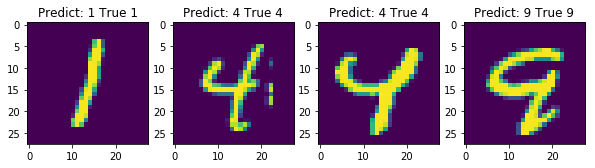

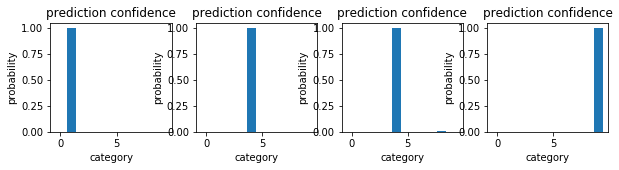

In [24]:
randnum = np.random.randint(0,5000,4)
x = x_test[randnum]
plt.figure(figsize=(10,30))
for i in np.arange(4):
    plt.subplot(1,4,i+1)
    y_predict = np.argmax(model.predict(x)[i])
    y_true = np.argmax(y_test[randnum[i]])
    img = np.reshape(x_test[randnum[i]], (28,28))
    plt.imshow(img)
    plt.title('Predict: %i True %i' %(y_predict, y_true ))
        
plt.figure(figsize=(10,2))
for i in range(4):
    bar = model.predict(x)[i]
    classes = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(1,4,i+1)
    plt.bar(classes, bar)
    plt.xlabel("category")
    plt.ylabel("probability")
    plt.title("prediction confidence")

## Acknowledgments
I would like to thank Felicia Nurindrawati for help create this Keras tutorial. Felicia is currently a graduate student working with Dr. Jiajia Sun in the Department of Earth and Atmospheric Sciences at the University of Houston. <br>

<img src = "poto.png" width="300">